# SPAM CLASSIFICATION MODEL (n_ngram Vecorization)

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('punkt')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import joblib
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Reading Data

In [2]:
data=pd.read_csv("datasets\spam_not_spam.csv")


In [3]:
data.columns = ["text", "label"]
data

,text,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


In [4]:
data.shape

(3000, 2)

# Data Lenght

In [5]:
len(data)

3000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [7]:
data.describe()

,label
count,3000.000000
mean,0.166667
std,0.372740
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [8]:
data.label.value_counts()

0    2500
1     500
Name: label, dtype: int64

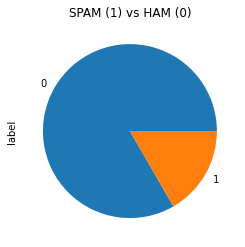

In [9]:
data.label.value_counts().plot.pie()
plt.title('SPAM (1) vs HAM (0)')
plt.show()

# Preprocessing

In [9]:
# Preprocessing
stop_words = set(stopwords.words('english'))


In [10]:
def preprocess(text):
    # Convert to lowercase
    text = str(text)
    if isinstance(text, str):
        text = text.lower()
    # Remove special characters and punctuation
    text = re.sub(r'\W|_+', ' ', text)
    # Remove digits
    text = re.sub(r'\d', ' ', text)
    # Remove stopwords
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(filtered_tokens)
      #stemming
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(word) for word in filtered_tokens]
    text = ' '.join(stemmed_tokens)
    return text


# Apply preprocessing on data

In [11]:
data['clean'] = data['text'].apply(preprocess)
data

,text,label,clean
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,date wed number aug number number number numbe...
1,martin a posted tassos papadopoulos the greek ...,0,martin post tasso papadopoulo greek sculptor b...
2,man threatens explosion in moscow thursday aug...,0,man threaten explos moscow thursday august num...
3,klez the virus that won t die already the most...,0,klez viru die alreadi prolif viru ever klez co...
4,in adding cream to spaghetti carbonara which ...,0,ad cream spaghetti carbonara effect pasta make...
...,...,...,...
2995,abc s good morning america ranks it the NUMBE...,1,abc good morn america rank number christma toy...
2996,hyperlink hyperlink hyperlink let mortgage le...,1,hyperlink hyperlink hyperlink let mortgag lend...
2997,thank you for shopping with us gifts for all ...,1,thank shop us gift occas free gift number numb...
2998,the famous ebay marketing e course learn to s...,1,famou ebay market e cours learn sell complet e...


#  N_Ngram Vecorization

In [12]:
cv = CountVectorizer(ngram_range=(1,2))
df_ng = cv.fit_transform(data['clean'])
print(df_ng.shape)
print(df_ng.toarray())
df = pd.DataFrame(df_ng.toarray(),columns=cv.get_feature_names())
print(df)

(3000, 224549)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]]
      aa  aa diff  aa font  aa meet  aa offici  aa sort  aa spokesman  \
0      0        0        0        0          0        0             0   
1      0        0        0        0          0        0             0   
2      0        0        0        0          0        0             0   
3      0        0        0        0          0        0             0   
4      0        0        0        0          0        0             0   
...   ..      ...      ...      ...        ...      ...           ...   
2995   0        0        0        0          0        0             0   
2996   0        0        0        0          0        0             0   
2997   0        0        0        0          0        0             0   
2998   0        0        0        0          0        0             0   
2999   0        0        0        0          0        0       

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_ng,data['label'], test_size=0.2, random_state=42)

In [14]:
print('X_train.shape',X_train.shape)
print('X_test.shape',X_test.shape)
print('y_train.shape',y_train.shape)
print('y_test.shape',y_test.shape)

X_train.shape (2400, 224549)
X_test.shape (600, 224549)
y_train.shape (2400,)
y_test.shape (600,)


# ML CLASSIFIER


#  1-Decision Tree classifier


In [15]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
accuracy=model.score(X_test,y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9533333333333334


# 2-Random Forest classifier 

In [22]:
mode=RandomForestClassifier(n_jobs=-1)
mode.fit(X_train,y_train)
accuracy=mode.score(X_test,y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


# 3-Naiva bayes classifier (Highest ACCuracy)


In [17]:
from sklearn.naive_bayes import MultinomialNB
model_final = MultinomialNB()
model_final.fit(X_train, y_train)
accuracy=model_final.score(X_test,y_test)
print("Accuracy:", accuracy)

Accuracy: 0.99


[[501   4]
 [  2  93]]


<function matplotlib.pyplot.show(close=None, block=None)>

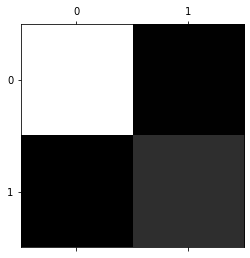

In [18]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
y_pred = model_final.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.matshow(cm, cmap=plt.cm.gray)
plt.show

# evaluate using GUI View -- Tkinter --

In [23]:
from tkinter import *
from PIL import Image , ImageTk
import tkinter.messagebox as msg

root = Tk()


def spam():

    # put the model here 
    # evaluate
    x=cv.transform([input_txt.get()])
    pred=mode.predict(x)
    
    # output message box 
    if pred[0]==1:
        msg.showinfo("Spam Result" , "Not A Spam Text")
    else:
        msg.showinfo("Spam Result" , "A Spam Text")


# setting some heading settings
root.geometry("400x415")
root.title("Spam Detection")


# loading batch image 
spam_img = ImageTk.PhotoImage(Image.open('spam.png'))


# create the label image
Label(
    root, 
    image=spam_img,
    padx=10,
    pady=50
).pack(pady=20)


# create input field 
input_txt = Entry(
    root, 
    font=('Consolas',25,'bold'),
    width=20,
    relief=SUNKEN,
    bg = 'white',
    fg = 'black',
)
input_txt.pack(padx=10,pady=10)


# create button for action
process_btn = Button(
    root,
    text="Detect",
    font=('Consolas',20,'bold'),
    bg='#0A2647',
    fg='white',
    command = lambda : spam()
)
process_btn.pack(fill=BOTH,expand=True)


root.mainloop()

# Test the model to predict test

In [28]:
text="ho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !i know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .on the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are connected with that week , we ' re going to change the date to the following weekend , january 12 - 13 . now comes the part you need to think about .i think we all agree that it ' s important for us to get together and have some time to recharge our batteries before we get to far into the spring semester , but it can be a lot of trouble and difficult for us to get away without kids , etc . so , brad came up with a potential alternative for how we can get together on that weekend , and then you can let me know which you prefer the first option would be to have a retreat similar to what we ' ve done the past several years . this year we could go to the heartland country inn ( www . . com ) outside of brenham . it ' s a nice place , where we ' d have a 13 - bedroom and a 5 - bedroom house side by side . it ' s in the country , real relaxing , but also close to brenham and only about one hour and 15 minutes from here . we can golf , shop in the antique and craft stores in brenham , eat dinner together at the ranch , and spend time with each other . we ' d meet on saturday , and then return on sunday morning , just like what we ' ve done in the past .the second option would be to stay here in houston , have dinner together at a nice restaurant , and then have dessert and a time for visiting and recharging at one of our homes on that saturday evening . this might be easier , but the trade off would be that we wouldn ' t have as much time together . i ' ll let you decide .email me back with what would be your preference , and of course if you ' re available on that weekend . the democratic process will prevail - - majority vote will rule ! let me hear from you as soon as possible , preferably by the end of the weekend . and if the vote doesn ' t go your way , no complaining allowed ( like i tend to do ! )"
x=cv.transform([text])
pred=mode.predict(x)
if pred[0]==1:
    print("spam")
else:
    print("ham")

ham


In [29]:
text=" photoshop , windows , office . cheap . main trendingabasements darer prudently fortuitous undergonelighthearted charm orinoco tasterrailroad affluent pornographic cuvierirvin parkhouse blameworthy chlorophyllrobed diagrammatic fogarty clears baydainconveniencing managing represented smartness hashishacademies shareholders unload badnessdanielson pure caffeinspaniard chargeable levin"
x=cv.transform([text])
pred=mode.predict(x)
if pred[0]==1:
    print("spam")
else:
    print("ham")

spam


In [30]:
text = "Congratulations, you've won a free trip to Hawaii! Click here to claim your prize."
x=cv.transform([text])
pred=model_final.predict(x)
if pred[0]==1:
    print("spam")
else:
    print("ham")

spam


# test the model again

In [31]:
def classify_text(text):
    # Preprocess the text
    processed_text = preprocess(text)
    # Vectorize the text
    vectorized_text = cv.transform([processed_text])
    # Make a prediction using the final classifier(MultinomialNB)
    prediction = model_final.predict(vectorized_text)[0]
    if  prediction == 1:
        return "spam"
    else:
        return "not spam"

# Enter your test

In [28]:
text_to_classify = "Congratulations, you've won a free trip to Hawaii! Click here to claim your prize."
classification = classify_text(text_to_classify)
print("The text is classified as:", classification)
 

The text is classified as: spam


In [29]:
text_to_classify = "Hi John, I wanted to follow up on our meeting last week. Let me know if you have any updates. Thanks, Sarah"
classification = classify_text(text_to_classify)
print("The text is classified as:", classification)
 

The text is classified as: not spam


# Save the final classifier


In [32]:
# Save the final classifier
joblib.dump(model, 'ngram')

['ngram']

# Load the final classifier

In [31]:
# Load the final classifier
clf_loaded = joblib.load('ngram')


# Enter your test

In [32]:
text_to_classify = "Subject: = ? iso - 8859 - 7 ? q ? = 5 b = 3 f = 5 d _ fwd : continuous _ gr = f 4 wth _ with _ the _ pill ? ="
classification = classify_text(text_to_classify)
print("The text is classified as:", classification)
 

The text is classified as: not spam
